**단계 1:** 전처리에 사용할 패키지 로드 및 초기화 

In [3]:
# 정규화에 사용할 데이터를 초기화 합니다.
# 데이터를 학습과 테스트에 사용할 것을 구분 (데이터, 라벨) 합니다.

import pandas as pd
from sklearn.preprocessing import StandardScaler

df_train = pd.DataFrame([
        [2, 1, 0],
        [3, 2, 0],
        [3, 4, 0],
        [5, 5, 1],
        [7, 5, 1],
        [2, 5, 0],
        [8, 9, 1],
        [9, 10, 1],
        [6, 12, 1]
    ], columns=['hour', 'attendance', 'pass'])
df_test = pd.DataFrame([
        [9, 2, 1],
        [6, 10, 1],
        [2, 4, 0]
    ], columns=['hour', 'attendance', 'pass'])


df_x_train = df_train.drop(['pass'], axis=1)
df_x_test = df_test.drop(['pass'], axis=1)
df_y_train = df_train['pass']
df_y_test = df_test['pass']

**단계 2:** Z 스코어 정규화

In [4]:
# Z 스코어 정규화를 진행합니다.
# Z 스코어 정규화는 평군을 0, 표준편차를 1.0으로 만드는 StandardScaler()를 사용합니다.
# 이후, fit()함수를 사용하여 학습용 데이터의 분포를 추정하고, trasnform() 함수는 학습/검증용 데이터를 변환합니다.
# StandardScaler()->fit()->transform, 이때 transform은 학습과 점증용 데이터에 대해서 각각 진행합니다.
# fit()함수에는 train에 관련된 데이터를 사용합니다.

transformer = StandardScaler()
transformer.fit(df_x_train) 
x_train = transformer.transform(df_x_train)
x_test = transformer.transform(df_x_test)

y_train = df_y_train.values
y_test = df_y_test.values

print(x_train)
print(x_test)
print(y_train) #[0 0 0 1 1 0 1 1 1]
print(y_test) #[1 1 0]

[[-1.20267559 -1.40552844]
 [-0.80178373 -1.11803399]
 [-0.80178373 -0.54304508]
 [ 0.         -0.25555063]
 [ 0.80178373 -0.25555063]
 [-1.20267559 -0.25555063]
 [ 1.20267559  0.89442719]
 [ 1.60356745  1.18192165]
 [ 0.40089186  1.75691055]]
[[ 1.60356745 -1.11803399]
 [ 0.40089186  1.18192165]
 [-1.20267559 -0.54304508]]
[0 0 0 1 1 0 1 1 1]
[1 1 0]


**단계 3:** 다양한 정규화 전/후의 분포 비교

In [6]:
# 패키지 import 및 데이터 초기화

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.DataFrame([
        [2, 1, 0],
        [3, 2, 0],
        [3, 4, 0],
        [5, 5, 1],
        [7, 5, 1],
        [2, 5, 0],
        [8, 9, 1],
        [9, 10, 1],
        [6, 12, 1]
    ], columns=['hour', 'attendance', 'pass'])
df_test = pd.DataFrame([
        [9, 2, 1],
        [6, 10, 1],
        [2, 4, 0]
    ], columns=['hour', 'attendance', 'pass'])


df_x_train = df_train.drop(['pass'], axis=1)
df_x_test = df_test.drop(['pass'], axis=1)
df_y_train = df_train['pass']
df_y_test = df_test['pass']

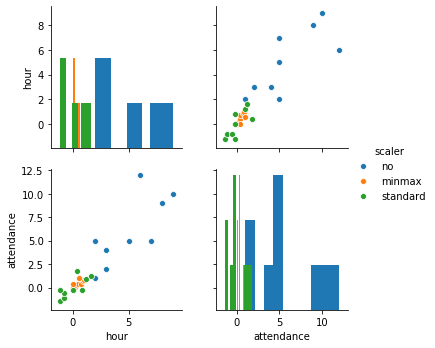

In [7]:
# 다양한 정규화 방법을 사용하여 정규화 전/후의 분포를 확인합니다.

# 최소-최대 정규화를 사용합니다.
transformer = MinMaxScaler()
transformer.fit(df_x_train)
x_train_minmax = transformer.transform(df_x_train)

# Z 스코어 정규화 (Standard)를 사용합니다.
transformer = StandardScaler()
transformer.fit(df_x_train)
x_train_standard = transformer.transform(df_x_train)

x_train = df_train.values
x_test = df_test.values

# 각 정규화의 결과를 출력합니다.

df_x_train['scaler'] = 'no'
df_x_train_minmax = pd.DataFrame(x_train_minmax, columns=['hour', 'attendance'])
df_x_train_minmax['scaler'] = 'minmax'
df_x_train_standard = pd.DataFrame(x_train_standard, columns=['hour', 'attendance'])
df_x_train_standard['scaler'] = 'standard'
sns.pairplot(data=pd.concat([df_x_train, df_x_train_minmax, df_x_train_standard], axis=0), hue='scaler', diag_kind='hist')
plt.show()